In [60]:
import numpy as np
import matplotlib.pyplot as plt

# The function below will simulate any function at small scale
# it uses newton method to find solutions
 
def step_forward(f, dt):
    """Performs the "Explicit Euler" method for approximating the ODEs"""
    dx = dt * f()
    return  dx


# p(A)^2 + 2p(A)p(a) + p(a)^2 = 1
# (p(a) + p(A))^2 = 1
# p(a) + p(A) = 1

p_A = 0.01
s = 0.1
h = 1


def p_a():
    return 1 - p_A

def frq_allele_AA():
    return p_A ** 2
def frq_allele_aa():
    return p_a() ** 2

def frq_alleleAa():
    return 2 * p_A * p_a()



def fitness_AA():
    return 1 + s
def fitness_aa():
    return 1
def fitness_aA():
    return 1 + s * h

def mean_fitness():
    return frq_allele_AA() * fitness_AA() + frq_allele_aa() * fitness_aa() + frq_alleleAa() * fitness_aA()


def next_generation_frq_A():
    return (frq_allele_AA() * fitness_AA() + p_A * p_a() * fitness_aA() * fitness_aa()) / mean_fitness()


def iterate_and_plot(iteration = 200):
    global p_A
    


    p_As = np.zeros(iteration)
    p_As[0] = p_A

    mean_fitnesss = np.zeros(iteration)
    mean_fitnesss[0] = mean_fitness()

    for i in range(1, iteration):
        p_As[i] = next_generation_frq_A()
        mean_fitnesss[i] = mean_fitness()
        p_A = p_As[i]


    plt.plot(p_As)
    plt.plot(1 - p_As)
    plt.title("Allele Frequency over time")
    plt.legend(["p(A)", "p(a)"])

    ## new plot
    plt.figure()

    plt.plot(mean_fitnesss)
    plt.title("Mean Fitness over time")


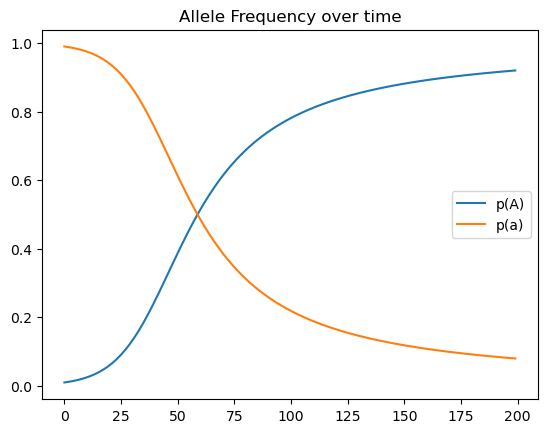

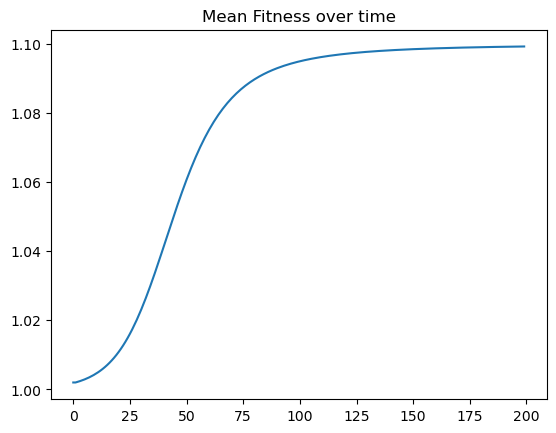

In [61]:

iterate_and_plot()

# Notice that the mean fitness will converge to allele A fitness.

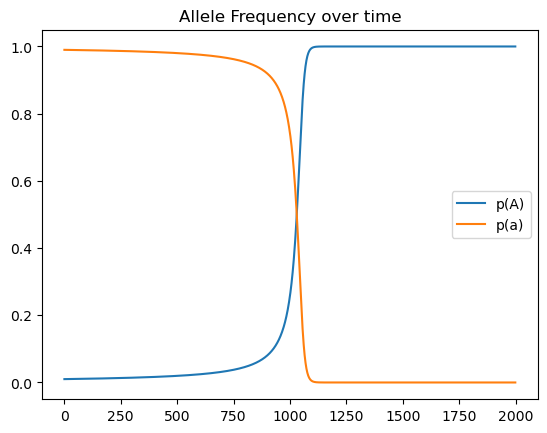

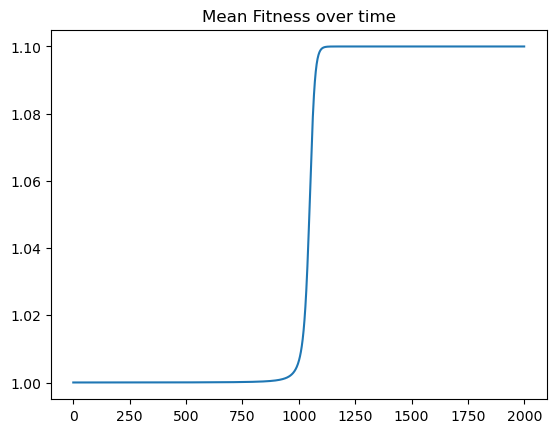

In [63]:
p_A = 0.01
s = 0.1
h = 0

iterate_and_plot(2000)